In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, chisquare

datadir = 'data/'
figdir = 'figs/'

In [2]:
def poisson(mu):
    def poisson_pdf(x):
        return mu ** x * np.exp(-1*mu) / np.math.factorial(x)
    return np.vectorize(poisson_pdf, otypes=[float])

plateau from 440 V to 465 V
relative gradient: 2.499 %
linear regression parameters:
slope 0.7020000000000001, intercept -299.14000000000004, r-value 0.9745873249062658


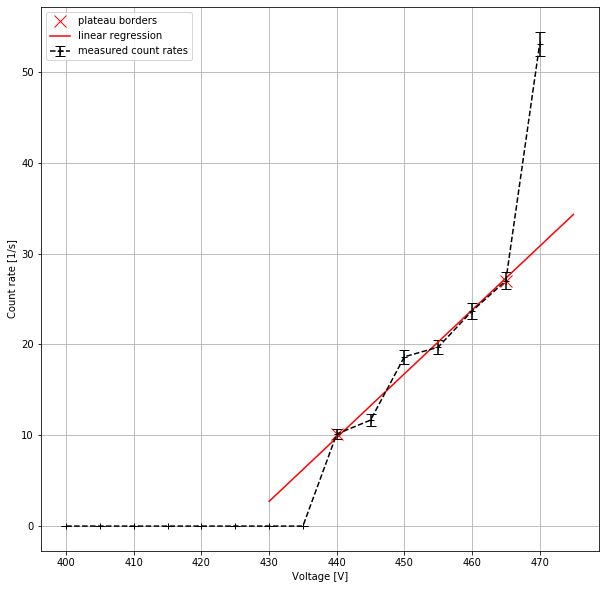

In [3]:
filename = 'plateau_400_470_5.tsv'
data = np.loadtxt(datadir + filename, delimiter = '\t', skiprows = 11, usecols = (1,2))
U = data[:,0]
G = data[:,1]
t_g = 30
g = G/t_g
stds = [np.sqrt(G)/t_g for G in data[:,1]]

pis = [8, 13] # plateau indices
print('plateau from %.f V to %.f V' % (data[pis[0],0], data[pis[1],0]))

relative_gradient = (data[13,1] - data[8,1])/(data[13,0] - data[8,0])/data[13,1]*100
print('relative gradient: %.3f %%' % relative_gradient)

slope, intercept, r, p, stderr = linregress(U[pis[0]:pis[1]], g[pis[0]:pis[1]])
print(f'linear regression parameters:\nslope {slope}, intercept {intercept}, r-value {r}')
linreg = lambda U: slope * U + intercept
U_extend = 10
U_plot = np.linspace(U[pis[0]] - U_extend, U[pis[1]]+U_extend, 100) # generate voltage data for plotting

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.grid()
ax.set_xlabel('Voltage [V]')
ax.set_ylabel('Count rate [1/s]')
ax.errorbar(U, g, fmt = 'k+--', capsize=5, yerr = stds, label = 'measured count rates')
ax.plot(U[pis], g[pis], 'rx', markersize=12, label = 'plateau borders')
ax.plot(U_plot, linreg(U_plot), 'r-', label = 'linear regression')
ax.legend()
fig.savefig(figdir + 'plateau_curve.pdf')

In [4]:
filename = 'background_150_10.tsv'
data = np.loadtxt(datadir + filename, delimiter = '\t', skiprows = 11, usecols = (1,2))
t_B = 10 # measurement time [s]

counts = data[:,1]
N = counts.shape # number of measured intevals
B_mean = np.mean(counts)
s_B = np.sqrt(B_mean)
print('mean: %.3f' % B_mean)
print('std: %.3f' % s_B)

pdf = poisson(B_mean)

mean: 3.840
std: 1.960


chi²: 6.594120711694024, p. 0.9492285997537161


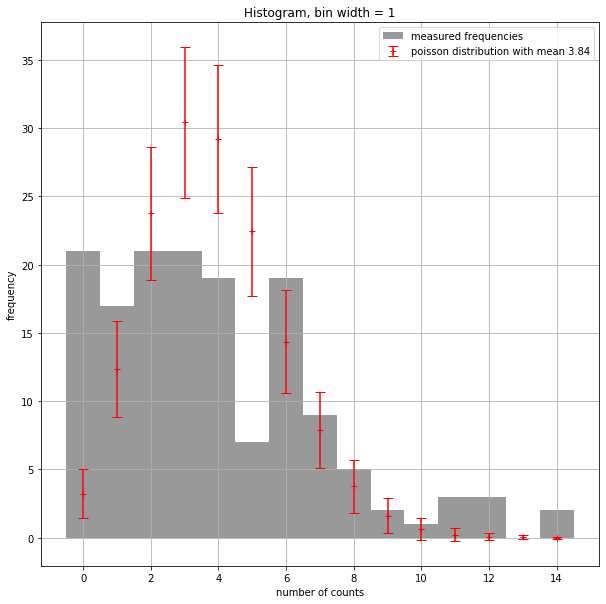

In [5]:
n_bins = int(max(counts))
freq, edges = np.histogram(counts, n_bins)
B_j = edges[:-1] # discard last bin edge

freq_c = pdf(B_j) * N # calculated frequencies
freq_c_err = np.sqrt(freq_c)

chi_2_calc, p = chisquare(freq/N, freq_c/N, ddof = 0)
print(f'chi²: {chi_2_calc}, p. {p}')

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.set_title('Histogram, bin width = 1')
ax.grid()
ax.set_xlabel('number of counts')
ax.set_ylabel('frequency')
ax.bar(B_j, freq, 
       width = 1, color = 'grey', alpha=0.8, label = 'measured frequencies')
ax.errorbar(B_j, freq_c, yerr = freq_c_err, 
            capsize = 5, fmt='r+', label = f'poisson distribution with mean {B_mean}')
ax.legend()
fig.savefig(figdir + '/histogram_1.pdf')

bin edges: [0, 8]
measured frequencies: [134.  16.]
calculated frequencies: [143.67403335   6.3255237 ]
chi²: 0.10298576505724327, p. 0.7482755999856311


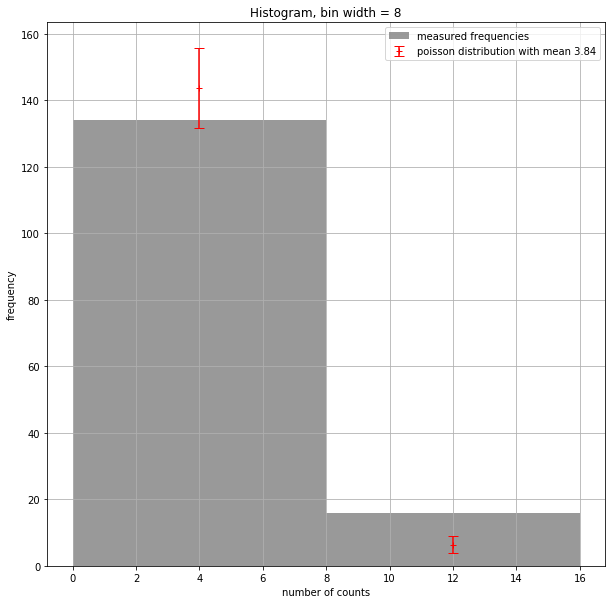

In [6]:
bin_width = 8

edges = []
edge = 0
while edge < max(counts):
    edges.append(edge)
    edge += bin_width
print('bin edges:', edges)

edges_plot = [edges[i] + bin_width / 2 for i in range(len(edges))]


freq = np.zeros(len(edges))
for i, edge in enumerate(edges):
    freq[i] = sum(np.where(np.logical_and(edge <= counts, counts < (edge + bin_width)), 1, 0))
print('measured frequencies:', freq)

freq_c = np.zeros(len(edges))
for i, edge in enumerate(edges):
    for j in range(bin_width):
        freq_c[i] += pdf(edge + j) * N
print('calculated frequencies:', freq_c)
freq_c_err = np.sqrt(freq_c)

chi_2_calc, p = chisquare(freq/N, freq_c/N, ddof = 0)
print(f'chi²: {chi_2_calc}, p. {p}')

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.set_title(f'Histogram, bin width = {bin_width}')
ax.grid()
ax.set_xlabel('number of counts')
ax.set_ylabel('frequency')
ax.bar(edges_plot, freq, width = bin_width, color = 'grey', alpha=0.8, label = 'measured frequencies')
ax.errorbar(edges_plot, freq_c, yerr = freq_c_err, 
            capsize = 5, fmt='r+', label = f'poisson distribution with mean {B_mean}')
ax.legend()
fig.savefig(figdir + '/histogram_2.pdf')

In [7]:
# background rate

b_mean = B_mean / t_B
b_err = s_B / t_B / np.sqrt(N)

print(f'Background radiation rate: ({b_mean} +- {b_err}) 1/s')

Background radiation rate: (0.384 +- [0.016]) 1/s


In [21]:
# Exercise 3

filename = 'detector_test_20_30.tsv'
data = np.loadtxt(datadir + filename, delimiter = '\t', skiprows = 11, usecols = (1,2))

counts = data[:,1]
 
bin_width = 8

edges = []
edge = 0
while edge < max(counts):
    edges.append(edge)
    edge += bin_width
print('bin edges:', edges)

edges_plot = [edges[i] + bin_width / 2 for i in range(len(edges))]


freq = np.zeros(len(edges))
for i, edge in enumerate(edges):
    freq[i] = sum(np.where(np.logical_and(edge <= counts, counts < (edge + bin_width)), 1, 0))
print('measured frequencies:', freq)

freq_c = np.zeros(len(edges))
for i, edge in enumerate(edges):
    for j in range(bin_width):
        freq_c[i] += pdf(edge + j) * N
print('calculated frequencies:', freq_c)
freq_c_err = np.sqrt(freq_c)

chi_2_calc, p = chisquare(freq/N, freq_c/N, ddof = 0)
print(f'chi²: {chi_2_calc}, p. {p}')

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.set_title(f'Histogram, bin width = {bin_width}')
ax.grid()
ax.set_xlabel('number of counts')
ax.set_ylabel('frequency')
ax.bar(edges_plot, freq, width = bin_width, color = 'grey', alpha=0.8, label = 'measured frequencies')
ax.errorbar(edges_plot, freq_c, yerr = freq_c_err, 
            capsize = 5, fmt='r+', label = f'poisson distribution with mean {B_mean}')
ax.legend()
fig.savefig(figdir + '/histogram_2.pdf')

bin edges: [0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200, 208, 216, 224, 232, 240, 248, 256, 264, 272, 280, 288, 296, 304, 312, 320, 328, 336, 344, 352, 360, 368, 376, 384]
measured frequencies: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 3. 0. 1. 0. 1.
 1. 2. 2. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1.]


OverflowError: int too large to convert to float